#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample 
from sklearn.preprocessing import StandardScaler

#### Reading the csv file

In [2]:
df= pd.read_csv("trainDataset.csv")

#### Data description and handling nan

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pCR (outcome),400.0,12.727500,111.104111,0.000000,0.000000,0.000000,1.000000,999.000000
RelapseFreeSurvival (outcome),400.0,56.159792,26.763774,5.000000,38.000000,55.041667,73.000000,144.000000
Age,400.0,51.851171,10.864462,23.000000,44.616016,51.119781,60.000000,79.603012
ER,400.0,0.540000,0.499022,0.000000,0.000000,1.000000,1.000000,1.000000
PgR,400.0,2.900000,49.932235,0.000000,0.000000,0.000000,1.000000,999.000000
...,...,...,...,...,...,...,...,...
original_ngtdm_Busyness,400.0,176.969142,1045.305721,0.000000,18.628013,66.507214,154.300334,20764.693790
original_ngtdm_Coarseness,400.0,32500.032680,177545.921557,0.000248,0.001851,0.004399,0.013846,1000000.000000
original_ngtdm_Complexity,400.0,0.056721,0.047363,0.000000,0.018628,0.047029,0.084418,0.285100
original_ngtdm_Contrast,400.0,0.005948,0.008416,0.000000,0.000310,0.002301,0.007873,0.060742


In [4]:
# removing rows with value 999
df = df[df["pCR (outcome)"] !=999 ]
# df = df.replace([999], 0)

#### Outlier Analysis and removing outlier data points

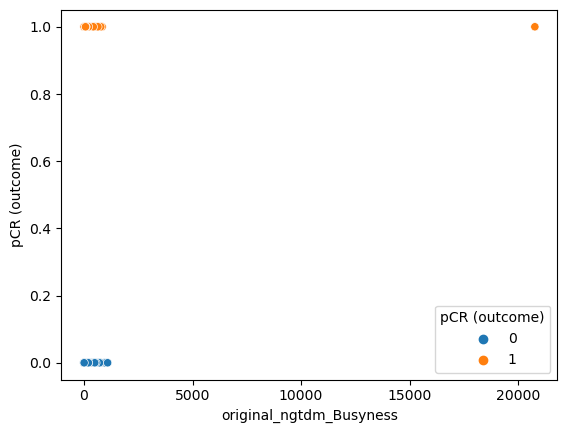

In [5]:
sns.scatterplot(x="original_ngtdm_Busyness",
                    y="pCR (outcome)",
                    data=df,hue="pCR (outcome)")

#### Exploring the target variable

96
24.3
299
75.7
395


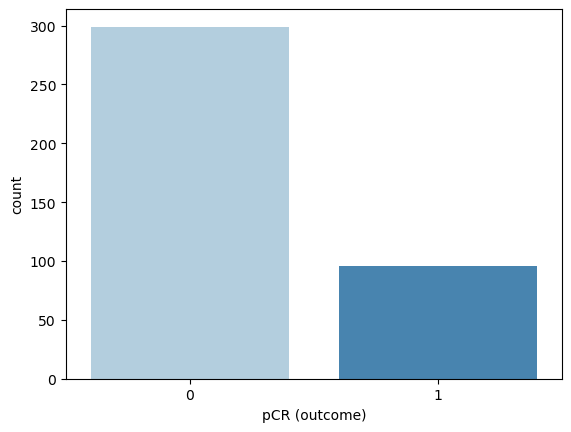

In [6]:
yes = df["pCR (outcome)"].sum()
no = len(df)-yes

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

sns.countplot(data=df, x='pCR (outcome)', palette="Blues")
print(yes)
print(yes_perc)
print(no)
print(no_perc)
print(len(df))

In [7]:
df["original_ngtdm_Busyness"].describe()

count      395.000000
mean       178.535250
std       1051.812623
min          0.000000
25%         18.723677
50%         68.117000
75%        155.512297
max      20764.693790
Name: original_ngtdm_Busyness, dtype: float64

In [8]:
df = df[df["original_ngtdm_Busyness"] <20000 ]

#### Dropping non-relevant columns 

In [9]:
df=df.drop("ID",axis=1)

#### Converting the values to numeric

In [10]:
df = df.apply(pd.to_numeric)

In [11]:
df2=df.copy()


In [12]:
df2 = df2.apply(pd.to_numeric)

#### Handling imbalance in the data through upsampling

In [13]:
pcr_true = df[df["pCR (outcome)"] == 1]
pcr_false = df[df["pCR (outcome)"] == 0]  

upsample = resample(pcr_true,
             replace=True,
             n_samples=len(pcr_false),
             random_state=42)
upsample_df = pd.concat([pcr_false,upsample])


#### Splitting data into inputs and outputs

In [14]:
X=upsample_df.drop(["pCR (outcome)","RelapseFreeSurvival (outcome)"],axis=1)
Y=upsample_df["pCR (outcome)"]
Y.head()

1    0
3    0
4    0
5    0
6    0
Name: pCR (outcome), dtype: int64

In [15]:
from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state=0)
Y.head()

155    0
56     0
153    1
68     1
292    0
Name: pCR (outcome), dtype: int64

#### Feature importance

In [16]:
mutual_info = MIC(X,Y)
print(mutual_info)

[0.21520012 0.02653173 0.08679548 0.04380636 0.01671646 0.03256896
 0.02080363 0.04345335 0.00603636 0.06238166 0.26223068 0.2406692
 0.23451316 0.2751981  0.25432966 0.26332224 0.22749356 0.26023673
 0.26400356 0.24310321 0.23078705 0.2616699  0.27765015 0.24355045
 0.20442203 0.25234308 0.28034263 0.25256068 0.30485946 0.27342439
 0.25956877 0.30189468 0.26570827 0.24723889 0.28774217 0.26368554
 0.28219418 0.2287374  0.22158    0.28034263 0.25259525 0.27717792
 0.23287296 0.2633784  0.28934136 0.23225147 0.24552319 0.25184301
 0.25017047 0.24923374 0.24792305 0.24848836 0.24490158 0.24743715
 0.24944459 0.21270385 0.2386674  0.25097733 0.21094756 0.24400449
 0.25370755 0.24496206 0.2624473  0.21089056 0.24551965 0.21780518
 0.24167211 0.25714866 0.25666585 0.26128277 0.264508   0.25325148
 0.255181   0.23920755 0.2663246  0.24772653 0.25368781 0.28468952
 0.21290045 0.2563215  0.29133144 0.25753544 0.25587913 0.23154098
 0.24897071 0.26106701 0.23207244 0.23666587 0.27669566 0.27515

In [17]:
print(max(np.round(mutual_info,decimals=2)))
print(min(np.round(mutual_info,decimals=2)))
print( np.round(np.mean(mutual_info),decimals=2 ) )
print( np.round(np.std(mutual_info),decimals=2 ) )

0.3
0.01
0.23
0.06


#### Train Test split

In [18]:
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(
    X,Y
    ,random_state=0
    ,stratify=Y
)

#### Feature scaling

In [19]:
sc= StandardScaler()
Fit = sc.fit(X_train_1)
X_train_1_zs = Fit.transform(X_train_1)
X_test_1_zs = Fit.transform(X_test_1)


#### Decision Tree Classifier

In [20]:
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

tree_cv.fit(X_train_1,Y_train_1)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 9, 'criterion': 'gini'}


Accuracy: 0.8133333333333334

              precision    recall  f1-score   support

           0       0.94      0.67      0.78        75
           1       0.74      0.96      0.84        75

    accuracy                           0.81       150
   macro avg       0.84      0.81      0.81       150
weighted avg       0.84      0.81      0.81       150


Average 5-Fold CV Score: 0.7902 , Standard deviation: 0.0494


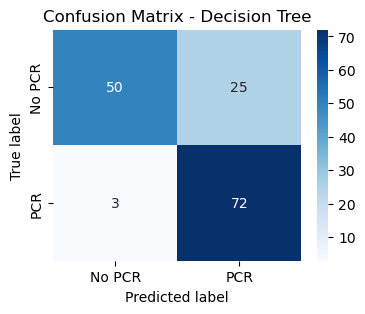

In [21]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 9, 
                                     max_features= 5, min_samples_leaf= 1, 
                                     random_state=0)
Tree.fit(X_train_1,Y_train_1)
y_pred_tree = Tree.predict(X_test_1)
print('Accuracy:', metrics.accuracy_score(y_pred_tree,Y_test_1))

## 5-fold cross-validation 
cv_scores =cross_val_score(Tree, X_train_1,Y_train_1, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(Y_test_1, y_pred_tree))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test_1,Tree.predict(X_test_1))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No PCR', 'PCR'], 
            yticklabels = ['No PCR', 'PCR'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

#### Random Forest classifier

In [22]:
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X_train_1,Y_train_1)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 100, 'max_features': 2, 'max_depth': 9, 'criterion': 'entropy'}


Accuracy: 0.9133333333333333

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        75
           1       0.89      0.95      0.92        75

    accuracy                           0.91       150
   macro avg       0.92      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150


Average 5-Fold CV Score: 0.8215 , Standard deviation: 0.0476


Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

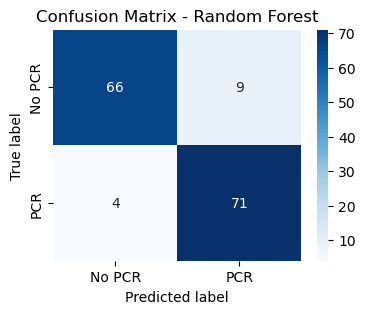

In [23]:
Ran = RandomForestClassifier(criterion= 'entropy', max_depth= 9, 
                                     max_features= 2, n_estimators= 100, 
                                     random_state=0)
Ran.fit(X_train_1,Y_train_1)
y_pred = Ran.predict(X_test_1)
print('Accuracy:', metrics.accuracy_score(y_pred,Y_test_1))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X_train_1,Y_train_1, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(Y_test_1, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test_1,Ran.predict(X_test_1))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No PCR', 'PCR'], 
            yticklabels =['No PCR', 'PCR'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest")

#### SVC classifier

Accuracy: 0.96

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        75
           1       1.00      0.92      0.96        75

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150


Average 5-Fold CV Score: 0.9108 , Standard deviation: 0.022


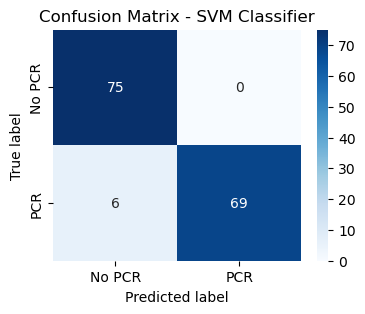

In [24]:
clf = SVC(C=1, kernel='rbf', degree=3, gamma='auto', probability=True,random_state=0)
clf.fit(X_train_1,Y_train_1)
y_pred = clf.predict(X_test_1)
print('Accuracy:', metrics.accuracy_score(y_pred,Y_test_1))

## 5-fold cross-validation 
cv_scores =cross_val_score(clf, X_train_1,Y_train_1, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(Y_test_1, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test_1,clf.predict(X_test_1))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No PCR', 'PCR'], 
            yticklabels = ['No PCR', 'PCR'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM Classifier");

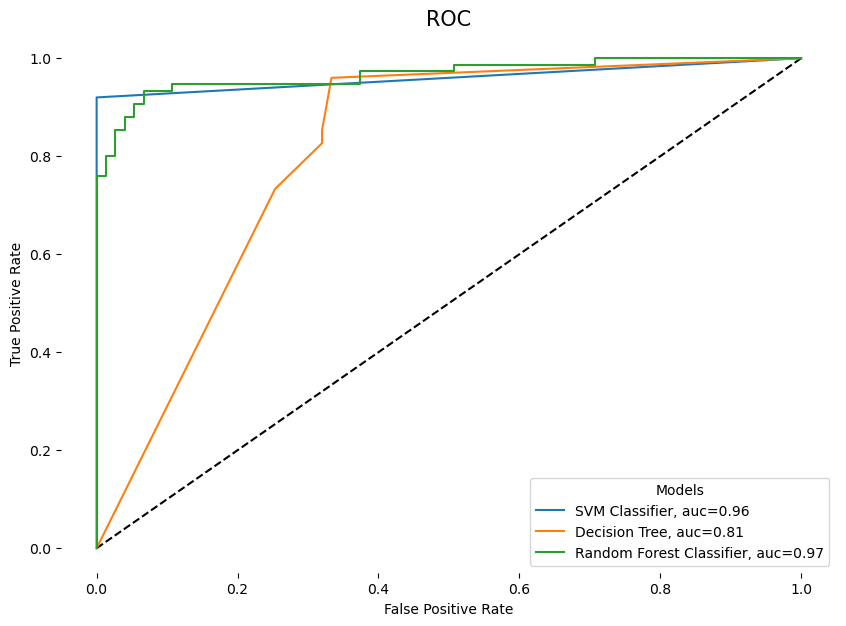

In [25]:
y_pred_proba_clf = clf.predict_proba(X_test_1)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(Y_test_1,  y_pred_proba_clf)
auc2 = metrics.roc_auc_score(Y_test_1, y_pred_proba_clf)

y_pred_proba_Tree = Tree.predict_proba(X_test_1)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(Y_test_1,  y_pred_proba_Tree)
auc3 = metrics.roc_auc_score(Y_test_1, y_pred_proba_Tree)

y_pred_proba_Ran = Ran.predict_proba(X_test_1)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(Y_test_1,  y_pred_proba_Ran)
auc4 = metrics.roc_auc_score(Y_test_1, y_pred_proba_Ran)


plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr2,tpr2,label="SVM Classifier, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Decision Tree, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Random Forest Classifier, auc="+str(round(auc4,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)

In [26]:
import pickle

In [27]:
filename = 'svc_model.sav'
pickle.dump(clf, open(filename, 'wb'))